In [ ]:

from google.colab import drive
drive.mount('/content/drive')import pandas as pd


df = pd.read_csv('/content/drive/Shareddrives/hack22/hack22/train.csv')
df_2 = pd.read_csv('/content/drive/Shareddrives/hack22/hack22/test.csv')
print(df.head())

   Id       Timestep   Course                Faculty  Expected
0   0  AY1810-AY1811  VX27870      Prof. Jadon Haney       386
1   1  AY1810-AY1811  SN11041  Prof. Kennedy Shields       158
2   2  AY1810-AY1811  CG17623    Prof. Brandon Silva       303
3   3  AY1810-AY1811  GW27856      Prof. Lorena Mays       207
4   4  AY1810-AY1811  SI10212   Prof. Haleigh Romero       329


In [ ]:
len(df.Course.unique())
# Courses=656, Timestep=177, Faculty=560, 

656

In [ ]:
len(df.Timestep.unique())

177

In [ ]:
len(df.Faculty.unique())

560

In [ ]:
len(df.Expected.unique())

1320

In [ ]:
df['Id'].value_counts()

0        1
59997    1
60005    1
60004    1
60003    1
        ..
29998    1
29997    1
29996    1
29995    1
89999    1
Name: Id, Length: 90000, dtype: int64

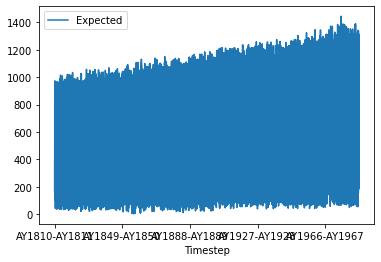

In [ ]:
df.plot(x='Timestep', y='Expected')

In [ ]:
X_train=df['Timestep']
Y_train=df['Expected']
X_test=df_2['Timestep']
X_new=[None]*90000
X_test_new=[None]*10000
Y_without_one=[None]*90000


In [ ]:
for i in range(len(X_train)):
  X_new[i]=int(X_train[i][2:6])
for i in range(len(X_test)):
  X_test_new[i]=int(X_test[i][2:6])
# for i in range(len(Y)):
#   if Y[i]<=2:
#     Y_without_one[i]=3
#   else:
#     Y_without_one[i]=Y[i]
# Y_without_one_train=Y_without_one[:81000]
# Y_without_one_test=Y_without_one[81000:]

In [ ]:
df['new_timestep']=X_new
df_2['new_timestep']=X_test_new

In [ ]:
import numpy as np
mean=np.mean(X_new)
sd=np.std(X_new)
X_normalized=[None]*90000
X_normalized_test=[None]*10000
for i in range(len(X_new)):
  X_normalized[i]=(X_new[i]-mean)/(sd)
for i in range(len(X_test_new)):
  X_normalized_test[i]=(X_test_new[i]-mean)/(sd)




Normalization of train


In [ ]:
df['norm_time']=X_normalized
df_2['norm_time']=X_normalized_test

In [ ]:
X_normalized_train=np.asarray(X_normalized)
X_normalized_test=np.asarray(X_normalized_test)
# X_normalized_train=X_normalized_array[:81000]
# X_normalized_test=X_normalized_array[81000:]

In [ ]:
X_normalized_train.resize(90000,1)
X_normalized_test.resize(10000,1)

In [ ]:
X_new=df['new_timestep']
df.tail()
from sklearn.preprocessing import LabelBinarizer
le=LabelBinarizer()
X_Course_train = le.fit_transform(df.Course)
X_Course_test = le.transform(df_2.Course)
from sklearn.preprocessing import LabelBinarizer
le2=LabelBinarizer()
X_Faculty_train = le2.fit_transform(df.Faculty)
X_Faculty_test = le2.transform(df_2.Faculty)

In [ ]:




import numpy as np
  
arr1 = np.array(X_Course_train)
arr2 = np.array(X_Faculty_train)
arr3 = np.array(X_normalized_train)
  
X_combined_train = np.concatenate((arr1, arr2), axis = 1)
for i in range(5):
  X_combined_train=np.concatenate((arr3,X_combined_train,arr3),axis=1)

ar1 = np.array(X_Course_test)
ar2 = np.array(X_Faculty_test)
ar3 = np.array(X_normalized_test)
  
X_combined_test = np.concatenate((ar1, ar2), axis = 1)
for i in range(5):
  X_combined_test=np.concatenate((ar3,X_combined_test,ar3),axis=1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import VotingRegressor
ren = MLPRegressor(random_state=1, max_iter=500)
# model = LinearRegression()
clf = linear_model.Lasso(alpha=0.01,)
lin = LinearRegression()
rig = linear_model.Ridge(alpha=1.0,)
reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3,loss='squared_error'))

eclf1 = VotingRegressor(estimators=[
        ('sgd',reg),('lin',lin)],)
eclf11 = eclf1.fit(X_combined_train[84000:] ,Y_train[84000:])


y_pred=eclf11.predict(X_combined_test)


In [ ]:
y_pred
import pickle
filename = 'soft3.sav'
pickle.dump(eclf11, open(filename, 'wb'))

In [ ]:
y_pred.resize(10000,)
y_pred.shape

(10000,)

In [ ]:

ids=df_2['Id']
ids=ids.array
ids.shape

(10000,)

In [ ]:
data={'Id':ids,'Predicted':y_pred}
df3=pd.DataFrame(data)

In [ ]:
df3.head


<bound method NDFrame.head of         Id    Predicted
0        0   744.403196
1        1   424.026473
2        2   567.561745
3        3   412.568686
4        4  1035.271940
...    ...          ...
9995  9995  1050.505421
9996  9996   974.975444
9997  9997   499.308688
9998  9998   766.464298
9999  9999   426.010782

[10000 rows x 2 columns]>

In [ ]:
df3.to_csv('Lin_soft2.csv')

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# model2 = RandomForestClassifier(max_depth=2, random_state=0)
# model2 = model2.fit(X_combined_train , Y_train_array)

In [ ]:
# y_pred2=model2.predict(X_combined_test)

In [ ]:
# mean_squared_error(Y_test_array, y_pred2,squared=False)

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# model3 = RandomForestRegressor(max_depth=4, random_state=0,)
# model3=model3.fit(X_combined_train[60000:],Y_train_array[60000:])
# y_pred3=model3.predict(X_combined_test[:100])
# mean_squared_error(Y_test_array[:100], y_pred3, squared=False)